# Medical Cost Prediction

Data Source: https://www.kaggle.com/mirichoi0218/insurance <br>

### Content

#### Columns

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the    US,northeast,southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance


#### Inspiration :
find accuratly predict insurance costs.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Read Dataset

In [7]:
data = pd.read_csv(r"C:\Users\asus\Desktop\github\medical_cost\medical_cost.csv")

In [8]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


We have 4 numerical feature ( age, bmi, children, charges) and 2 categorical feature (sex, region) and no null data

In [11]:
data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [12]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [14]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
data.dropna(how='any',axis =0,inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 67.9+ KB


In [17]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)

In [18]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

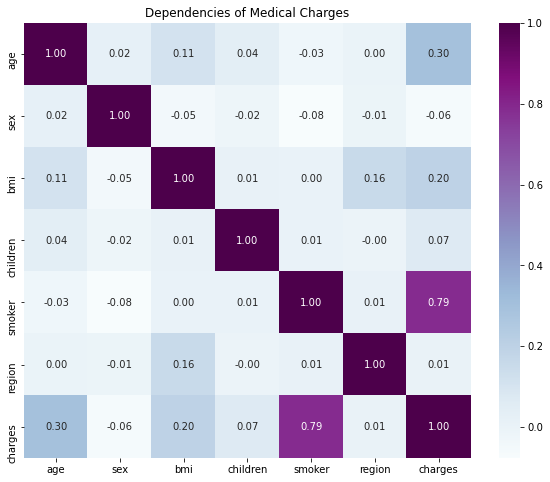

In [19]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
#plt.savefig('./sampleImages/Cor')
plt.show()

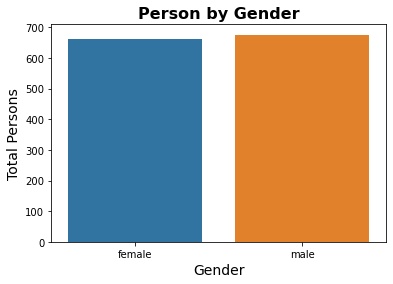

In [20]:
#Univarient Distribution :
sns.countplot(data['sex'])
plt.title('Person by Gender', fontsize='16', fontweight='bold')
plt.xlabel('Gender', fontsize='14')
plt.ylabel('Total Persons', fontsize='14')
plt.show()



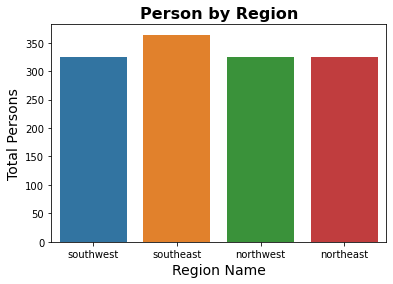

In [21]:
sns.countplot(data['region'])

plt.title('Person by Region', fontsize='16', fontweight='bold')
plt.xlabel('Region Name', fontsize='14')
plt.ylabel('Total Persons', fontsize='14')
plt.show()

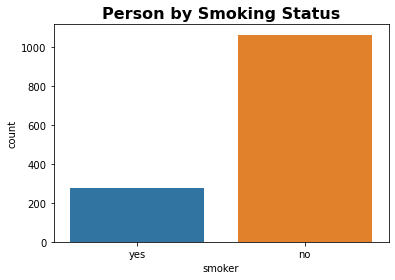

In [22]:
sns.countplot(data['smoker'])

plt.title('Person by Smoking Status', fontsize='16', fontweight='bold')
plt.show()

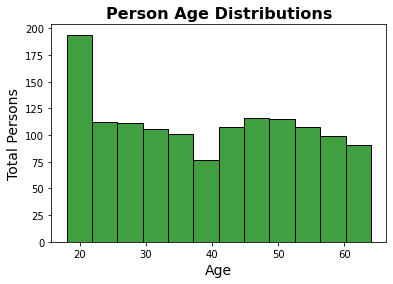

In [23]:
# Distribution Analysis:
sns.histplot(data['age'], color = 'green')

plt.title('Person Age Distributions', fontsize='16', fontweight='bold')
plt.xlabel('Age', fontsize='14')
plt.ylabel('Total Persons', fontsize='14')

plt.show()

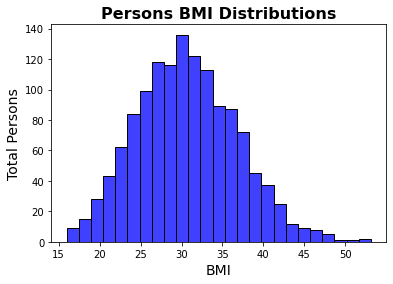

In [24]:
sns.histplot(data['bmi'], color = 'blue')

plt.title('Persons BMI Distributions', fontsize='16', fontweight='bold')
plt.xlabel('BMI', fontsize='14')
plt.ylabel('Total Persons', fontsize='14')
plt.show()

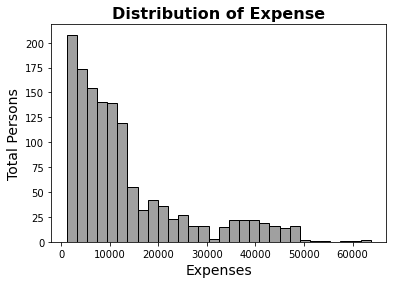

In [25]:
sns.histplot(data['charges'], color = 'gray')
plt.title('Distribution of Expense', fontsize='16', fontweight='bold')
plt.xlabel('Expenses', fontsize='14')
plt.ylabel('Total Persons', fontsize='14')
plt.show()

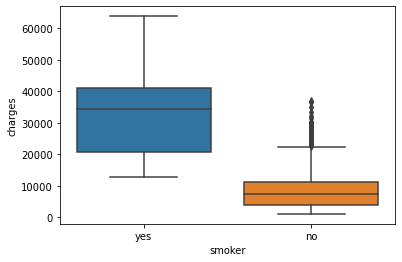

In [26]:
sns.boxplot(x = data['smoker'],y= data['charges'])
plt.show()

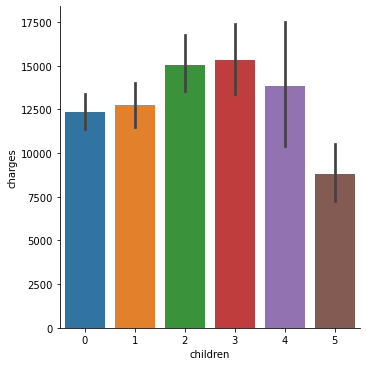

In [27]:
sns.catplot("children","charges", data=data, kind="bar")
plt.show()

In [28]:
import plotly.express as px
px.bar_polar(data, 
             r='charges',
             theta='region', 
             color='sex',
            template = 'plotly_dark')

In [29]:
data[['charges', 'region']].groupby(['region']).agg(['min', 'max', 'mean'])

charges                           
                 min          max          mean
region                                         
northeast  1694.7964  58571.07448  13406.384516
northwest  1621.3402  60021.39897  12417.575374
southeast  1121.8739  63770.42801  14735.411438
southwest  1241.5650  52590.82939  12346.937377

## Data Preparation for ML model

All categorical should be Numorical

In [30]:
data['sex']  =data['sex'].replace(('female','male'),(1,2))

In [31]:
data['smoker'] = data['smoker'].replace(('no','yes'),(1,2))

In [32]:
data['region'] = data['region'].replace(('southeast', 'southwest', 'northwest', 'northeast'), (2, 1, 1, 1))

In [33]:
data.head()

age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       2       1  16884.92400
1   18    2  33.770         1       1       2   1725.55230
2   28    2  33.000         3       1       2   4449.46200
3   33    2  22.705         0       1       1  21984.47061
4   32    2  28.880         0       1       1   3866.85520

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 115.6 KB


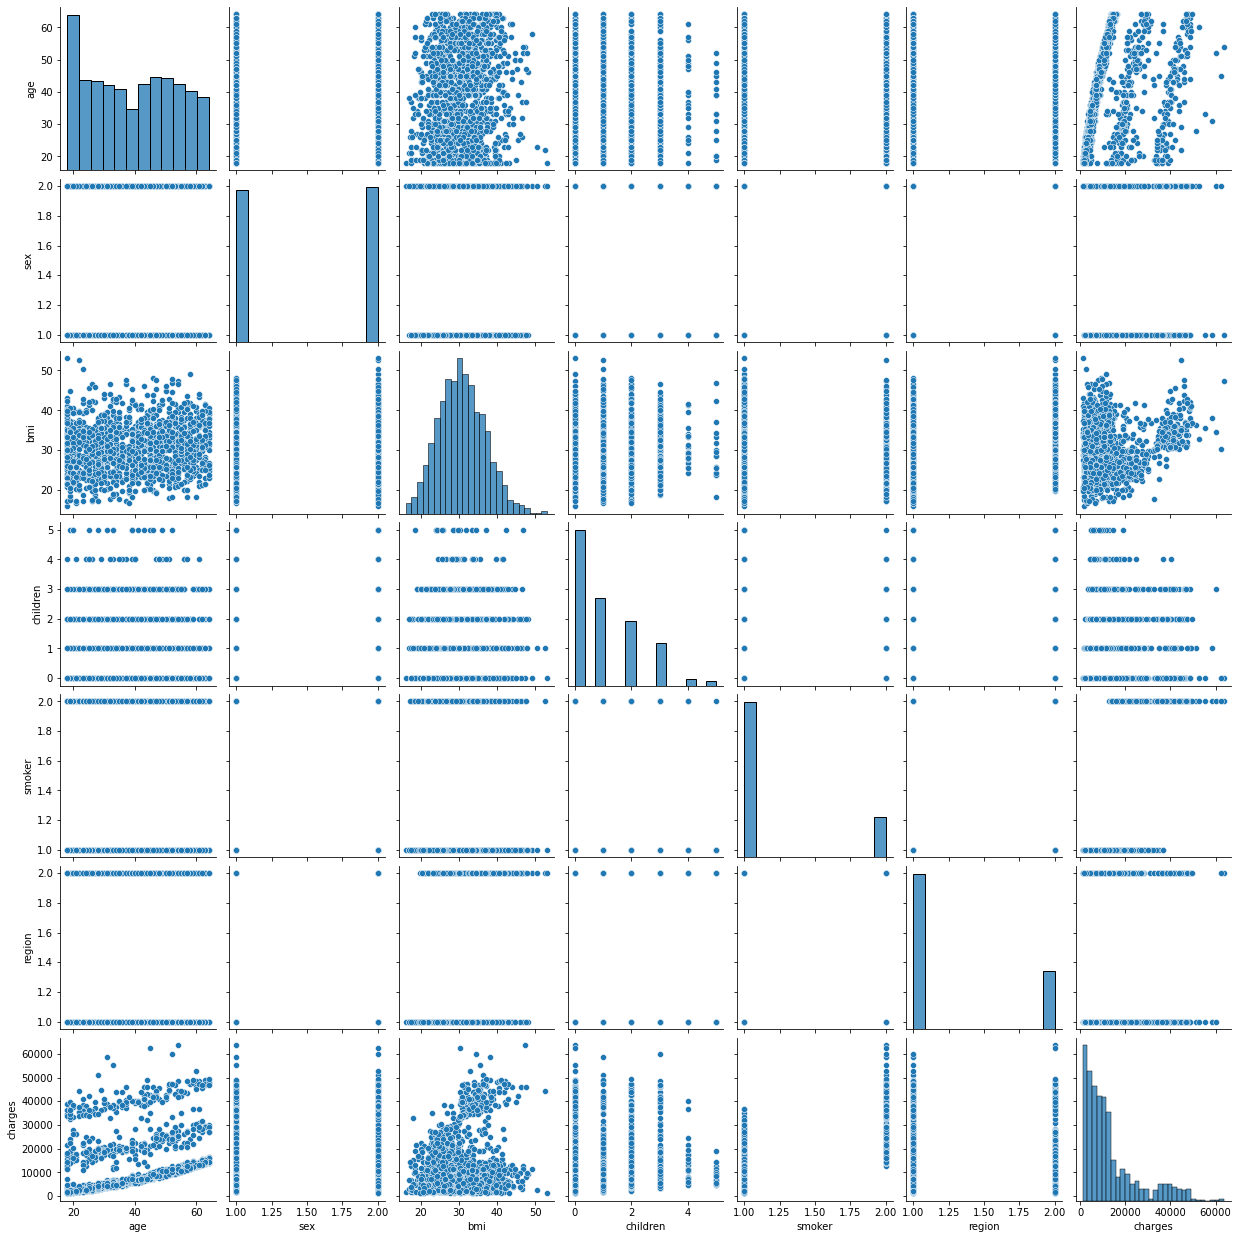

In [35]:
sns.pairplot(data)

### Dependent & Independent Feature
Seperating dependent ( charges) feature with independent (rest of the feature)

In [36]:
target = data['charges']
feature = data.drop(['charges'],axis=1)

In [37]:
print(target.shape)
print(feature.shape)

(1338,)
(1338, 6)


### Spliting Train & Test Data

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(feature,target,test_size=0.2,train_size=0.8,random_state=42)

In [40]:
print('X_train : ',X_train.shape)
print('X_test : ',X_test.shape)
print('Y_train : ',Y_train.shape)
print('Y_test : ',Y_test.shape)

X_train :  (1070, 6)
X_test :  (268, 6)
Y_train :  (1070,)
Y_test :  (268,)


##### feature Scaling

In [41]:
sc = StandardScaler()

In [42]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying Linear Regression Model

Find the relationship between with dependent variable with one or more independent variables

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression(n_jobs=1)

In [45]:
model.fit(X_train,Y_train)

LinearRegression(n_jobs=1)

In [46]:
pred_y = model.predict(X_test)

In [47]:
print(r2_score(Y_test,pred_y))
print(mean_squared_error(Y_test,pred_y))

0.7821770106209517
33816742.7908433


Cross validation Score

In [48]:
from sklearn.model_selection import cross_val_score 
score = cross_val_score(model, feature, target, cv=5)
print(score)

[0.76207647 0.70624946 0.77639397 0.73071885 0.75727566]


### Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf_model = RandomForestRegressor(n_jobs=1,n_estimators=7,random_state=14)

In [51]:
rf_model.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=7, n_jobs=1, random_state=14)

In [52]:
pred_rf = rf_model.predict(X_test)

In [53]:
print(r2_score(pred_rf,Y_test))
print(mean_squared_error(pred_rf,Y_test))

0.8408212215055985
23049667.021374475


In [54]:
score = cross_val_score(rf_model, feature, target, cv=5)
print(score)

[0.8428119  0.75737834 0.85837117 0.80646752 0.82920007]


In [55]:
np.sqrt(mean_squared_error(pred_rf,Y_test))

4801.006875789127

In [56]:
avg_model = (pred_y + pred_rf)/2

In [57]:
mse = mean_squared_error(Y_test, avg_model)
rmse = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse, 3))

r2_score = r2_score(Y_test, avg_model)
print('R square Score = ', round(r2_score, 3))

Root Mean Squared Error =  4733.181
R square Score =  0.856


So, If this model will predict any result it will be between actual value with plus of minus 4733 For that, this model will gain around 85% accuracy.

After that, accuracy is 85%. Also, In here again RandomForest  is winner.

In [58]:
import pickle

Pkl_Filename = "rf_tune.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf_model, file)

In [59]:
with open(Pkl_Filename, 'rb') as file:  
    rf_tuned_loaded = pickle.load(file)

In [60]:
rf_tuned_loaded

RandomForestRegressor(n_estimators=7, n_jobs=1, random_state=14)

In [61]:
pred=rf_tuned_loaded.predict(np.array([20,1,28,0,1,3]).reshape(1,6))[0]

In [62]:
print('{0:.3f}'.format(pred))

48774.763


In [63]:
X_train.shape

(1070, 6)

In [64]:
X_test.shape

(268, 6)

In [65]:
print(Y_train.shape)
print(Y_test.shape)

(1070,)
(268,)
